# A continuación se encuentra el código utilizado para el trabajo práctico que tiene como objetivo realizar un análisis descriptivo y exploratorio de un dataset que contiene información climática de Australia brindado por la cátedra, junto con la implementación de un modelo para la predicción de la variable "RainTomorrow" que indica si el día siguiente lloverá o no.

In [68]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report,matthews_corrcoef,cohen_kappa_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import optuna
import shap
from pycaret.classification import *

## Consigna 1

### Librerías a utilizar durante el trabajo

In [69]:
df = pd.read_csv('weatherAUS.csv')

Descripción de las variables a utilizar en el trabajo práctico y rango de variación de las mismas:

*   Date: Fecha de la observación meteorológica.
*   Location: Nombre o código de la estación meteorológica.
*   MinTemp: Temperatura mínima registrada en grados Celsius (-8, 30.3).
*   MaxTemp: Temperatura máxima registrada en grados Celsius (4.1, 46.9).
*   Rainfall: Cantidad de lluvia registrada en milímetros (0, 192).
*   Evaporation: Evaporación de agua en milímetros (0, 86.2).
*   Sunshine: Se registraron horas de sol brillante (0, 14.3).
*   WindGustDir: Dirección de la ráfaga de viento según sistema de coordenadas geográficas (W,SSE).
*   WindGustSpeed: Velocidad máxima de la ráfaga de viento en kilómetros por hora (7, 126).
*   WindDir9am: Dirección de la ráfaga de viento a las 9 am (W,SSE).
*   WindDir3pm: Dirección de la ráfaga de viento a las 3 pm (E,NW).
*   WindSpeed9am: Velocidad del viento a las 9 am en kilómetros por hora (0, 87).
*   WindSpeed3pm: Velocidad del viento a las 3 pm en kilómetros por hora (0, 72).
*   Humidity9am: Humedad relativa a las 9 am en porcentaje (1, 100).
*   Humidity3pm: Humedad relativa a las 3 pm en porcentaje (1, 100).
*   Pressure9am: Presión atmosférica a las 9 am en hPa (986.2, 1040.6).
*   Pressure3pm: Presión atmosférica a las 3 pm en hPa (982.6, 1037.9).
*   Cloud9am: Nubosidad a las 9 am en octavas (0, 9).
*   Cloud3pm: Nubosidad a las 3 p.m. en octavas (0, 8).
*   Temp9am: Temperatura a las 9 am en grados Celsius (-1.3, 39.4).
*   Temp3pm: Temperatura a las 3 pm en grados Celsius (3.7, 46.2).
*   RainToday: Variable binaria que indica si llovió hoy (1 para "Sí", 0 para "No").

Nuestra variable de salida o target será 'RainTomorrow'

*   RainTomorrow: variable de destino binaria que indica si lloverá mañana (1 para "Sí", 0 para "No").


In [70]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [71]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [72]:
df.groupby('Location').count()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3191,3190,3091,1704,1769,3167,3167,2919,3177,...,3188,3188,3185,3186,0,0,3188,3189,3091,3090
Albany,3040,2977,2986,3016,2750,2520,0,0,2793,2257,...,2991,2324,3015,3015,3002,2329,3001,2328,3016,3016
Albury,3040,3029,3029,3011,0,0,3008,3008,2515,2994,...,3031,3032,3035,3032,1289,1427,3031,3032,3011,3011
AliceSprings,3040,3039,3038,3032,2825,2520,2989,2989,2810,3036,...,3037,3035,3039,3037,2706,2679,3040,3038,3032,3031
BadgerysCreek,3009,2973,2980,2928,0,0,2933,2933,2574,2924,...,2955,2954,2841,2836,0,0,2968,2965,2928,2928
Ballarat,3040,3039,3039,3028,0,0,3009,3009,2949,3022,...,3019,3033,3016,3014,2494,1992,3028,3034,3028,3028
Bendigo,3040,3038,3035,3034,1185,0,2999,3000,2796,2997,...,3033,3038,3025,3030,2072,2268,3037,3038,3034,3034
Brisbane,3193,3184,3179,3161,3174,3144,3152,3152,3123,3159,...,3189,3178,3192,3185,3192,3191,3189,3178,3161,3161
Cairns,3040,3039,3040,2988,2670,2564,3021,3022,2997,3036,...,3039,3040,3039,3040,2833,2810,3039,3040,2988,2988


In [73]:
df[df['Location'] == 'MountGini']['Location'] = 'MountGinini'

In [74]:
lista = list(df['Location'].unique())

### Selección de localidades aleatoriamente

In [75]:
import random
random.seed(147855)

In [76]:
selected_locations = random.sample(list(df['Location'].unique()), 10)

In [77]:
selected_locations

['Melbourne',
 'Sydney',
 'Albany',
 'WaggaWagga',
 'Albury',
 'CoffsHarbour',
 'Perth',
 'Canberra',
 'NorfolkIsland',
 'Moree']

In [78]:
df = df[df['Location'].isin(selected_locations)]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123826,2017-06-21,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,...,89.0,60.0,1017.1,1013.8,5.0,6.0,13.0,18.5,No,Yes
123827,2017-06-22,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,...,90.0,75.0,1005.6,1008.9,7.0,7.0,16.4,15.6,Yes,No
123828,2017-06-23,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,...,85.0,65.0,1019.2,1019.4,6.0,6.0,15.1,18.0,No,No
123829,2017-06-24,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,...,62.0,47.0,1025.9,1023.4,1.0,3.0,14.0,17.6,No,No


In [79]:
df.isna().sum()

Date                0
Location            0
MinTemp           582
MaxTemp           572
Rainfall         1125
Evaporation      7302
Sunshine         8839
WindGustDir      4978
WindGustSpeed    4974
WindDir9am       2158
WindDir3pm       1487
WindSpeed9am      672
WindSpeed3pm     1332
Humidity9am       658
Humidity3pm      1273
Pressure9am      1077
Pressure3pm      1072
Cloud9am         6105
Cloud3pm         6676
Temp9am           572
Temp3pm          1232
RainToday        1125
RainTomorrow     1125
dtype: int64

### Dropeamos NA de la variable respuesta RainTomorrow

In [80]:
df = df.dropna(subset=['RainTomorrow'])

In [81]:
df.isna().sum()

Date                0
Location            0
MinTemp            79
MaxTemp            46
Rainfall          313
Evaporation      7059
Sunshine         8503
WindGustDir      4867
WindGustSpeed    4863
WindDir9am       2080
WindDir3pm       1416
WindSpeed9am      615
WindSpeed3pm     1263
Humidity9am       156
Humidity3pm       763
Pressure9am       544
Pressure3pm       540
Cloud9am         5321
Cloud3pm         5888
Temp9am            71
Temp3pm           722
RainToday         313
RainTomorrow        0
dtype: int64

### Codificación de variables categóricas

In [82]:
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)

### Separamos en dataset entrenamiento y testeo

In [83]:
y = df['RainTomorrow']
X = df.drop(columns = ['RainTomorrow'])

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [84]:
media = y_train.mean()
sd = sqrt((media * (1 - media)) / len(y))

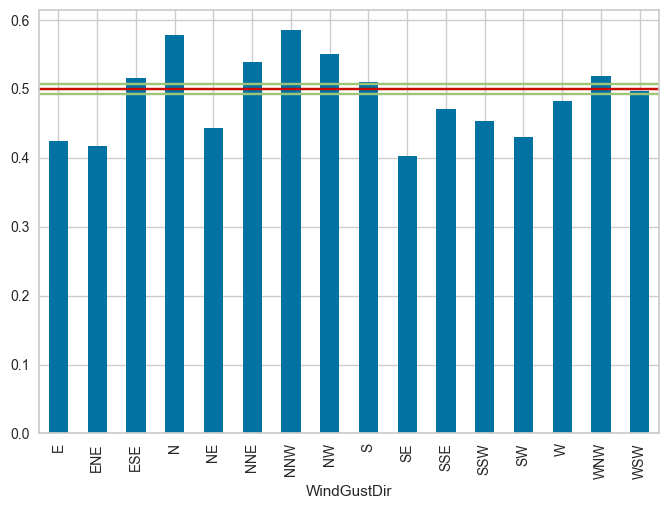

In [85]:
train = pd.concat([X_train, y_train], axis=1)

(train.groupby('WindGustDir')['RainTomorrow'].mean()).plot(kind = 'bar')
# Creamos una linea horizontal en el promedio de RainTomorrow
plt.axhline(y=media, color='r', linestyle='-')
plt.axhline(y=media + 2.5 * sd, color='g', linestyle='-')
plt.axhline(y=media - 2.5 * sd, color='g', linestyle='-')

In [86]:
# Creamos nueva variable 'WindGust' si esta dentro de alguna de las categorias
# que este por arriba de la media va a ser 1 si no 0
windgust = df.groupby('WindGustDir')['RainTomorrow'].mean()

X_train['WindGust'] = X_train['WindGustDir'].apply(lambda x: 1 if not pd.isnull(x) and windgust.get(x) > y_train.mean() else 0)
X_test['WindGust'] = X_test['WindGustDir'].apply(lambda x: 1 if not pd.isnull(x) and windgust.get(x) > y_train.mean() else 0)

X_train.drop('WindGustDir', axis=1, inplace=True)
X_test.drop('WindGustDir', axis=1, inplace=True)

### Matriz de correlación

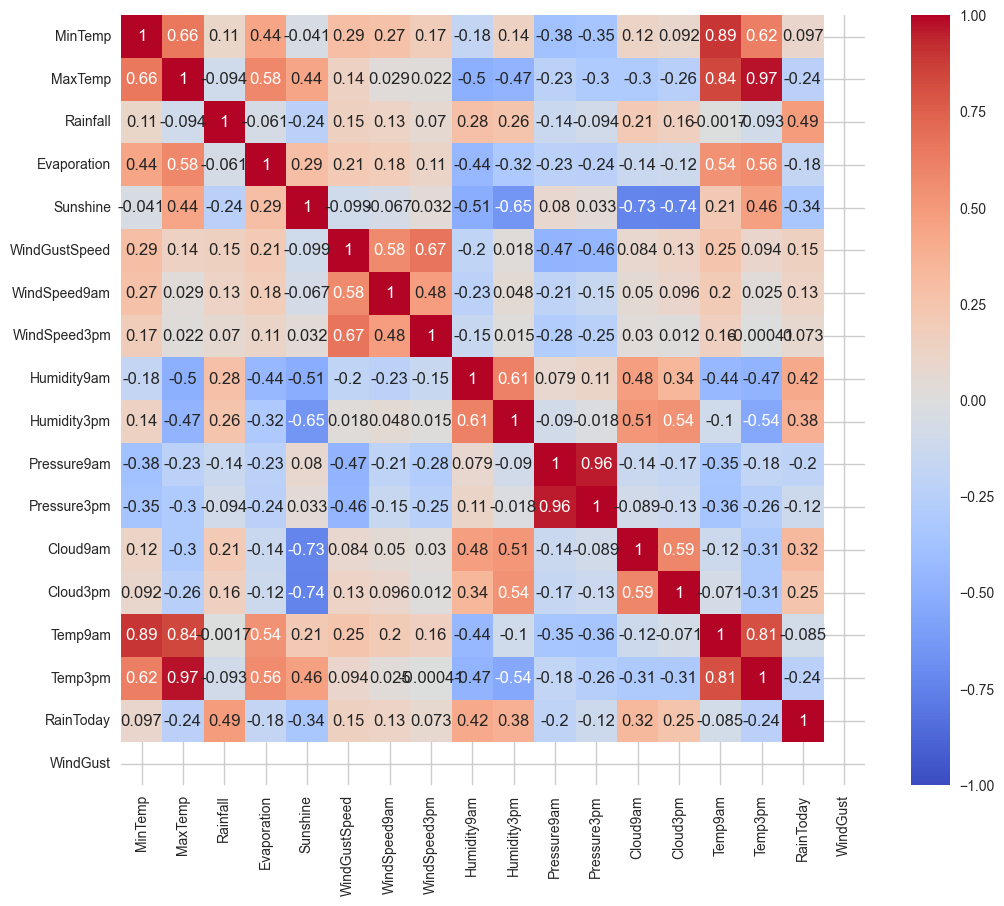

In [87]:
# Tomamos todas las variables numericas
df_train_num = X_train.select_dtypes(include=['int64', 'float64'])

# Creamos un heatmap con la correlacion de estas variables
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_num.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

Temp 9am y 3pm es correlacionado casi perfecto  con min y max temp respectivamente. Por lo que vamos a eliminar alguna de estas.

Ademas, Sunshine este altamente correlacionado negativamente con humidity y cloud tanto 9am como 3pm. Pero tiene mas nulls que las anteriores por lo que tambien dropeo esta fila a pesar de la buena correlacion que tiene con la variable respuesta

(La colinealidad de las variables afecta el modelo lineal)

Ademas, windspeed tanto 9am como 3pm no pareciera tener una correlacion grande por lo que tambien se eliminara

In [88]:
X_test = X_test.drop(['Temp3pm', 'Temp9am', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'WindDir9am', 'WindDir3pm', 'Pressure9am'], axis=1)
X_train = X_train.drop(['Temp3pm', 'Temp9am', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm','WindDir9am', 'WindDir3pm', 'Pressure9am'], axis=1)

X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_cat = X_train.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_cat = X_test.select_dtypes(include=['object'])

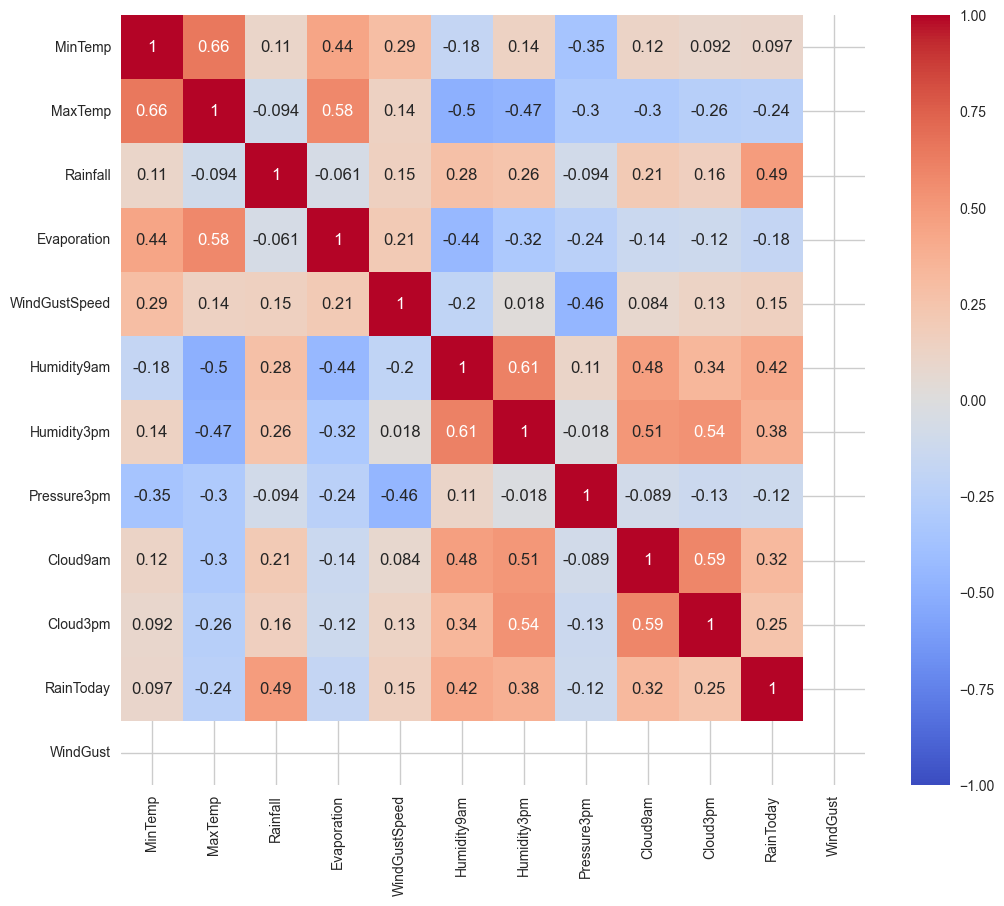

In [22]:
# Creamos un heatmap con la correlacion de las variables restantes
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_num.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

### Visualización de las variables

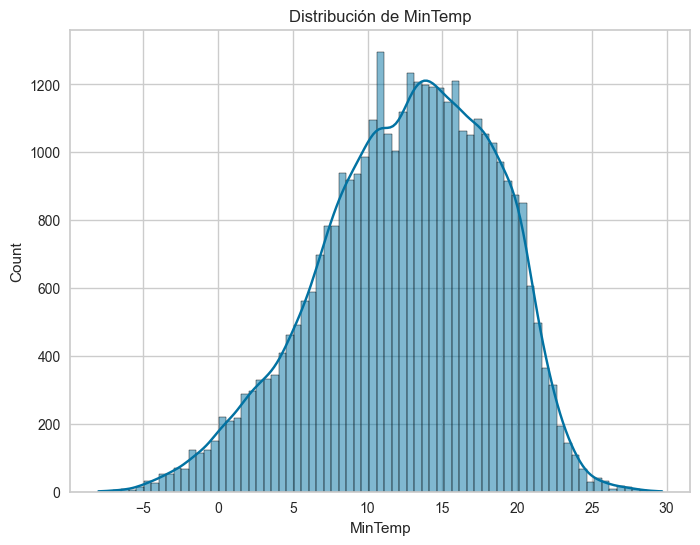

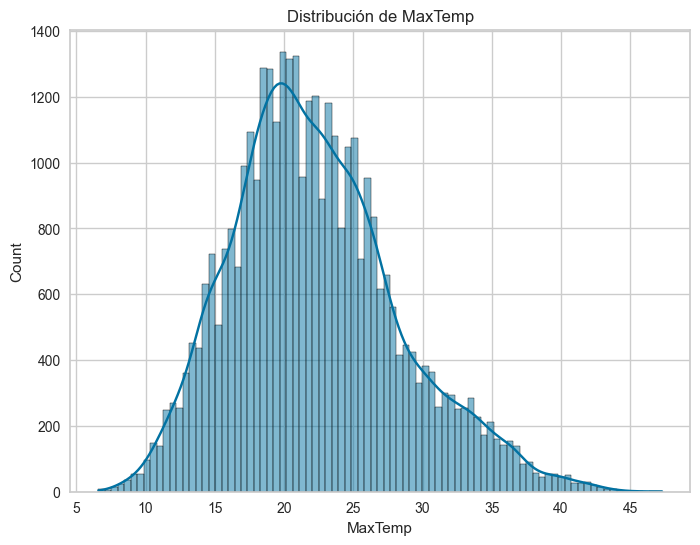

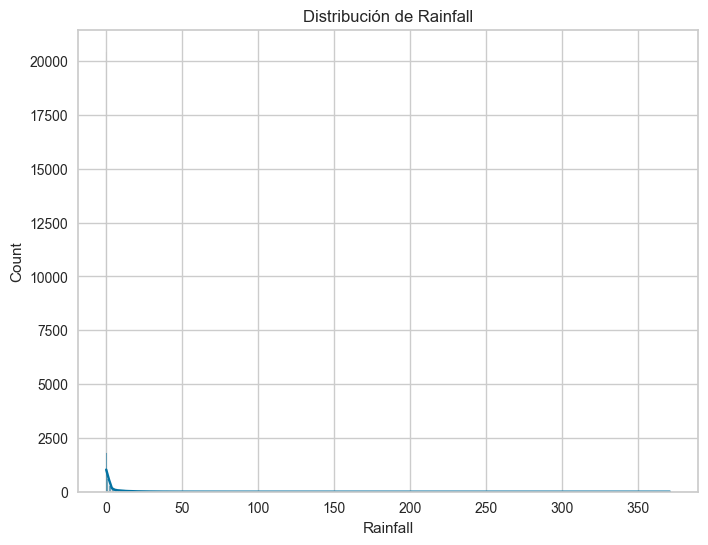

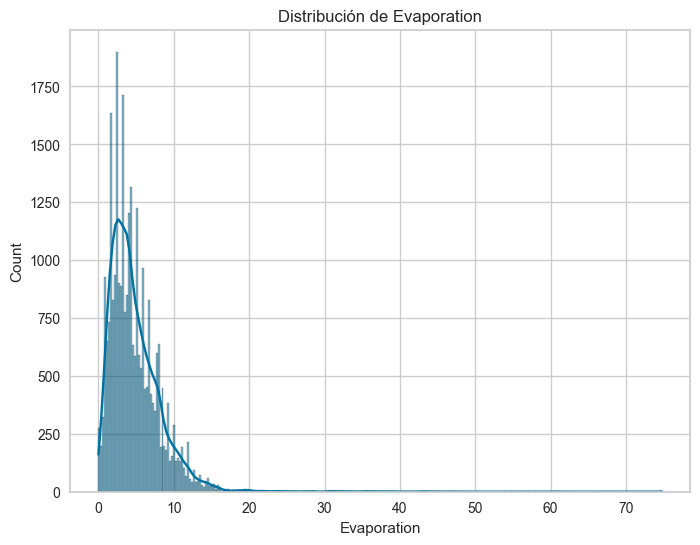

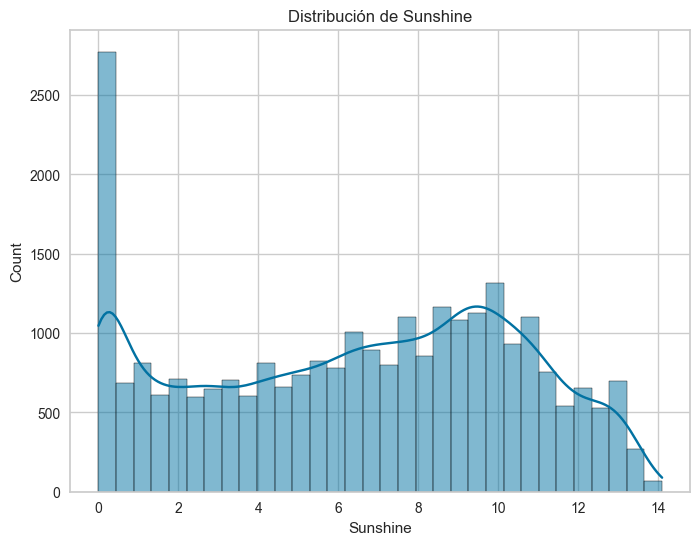

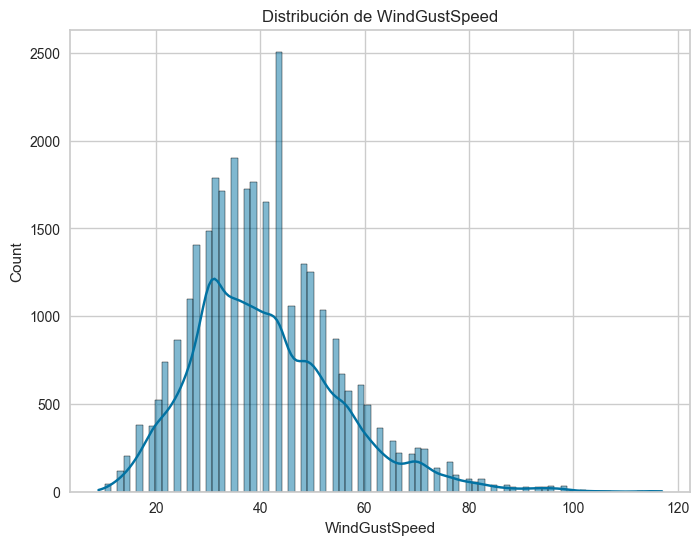

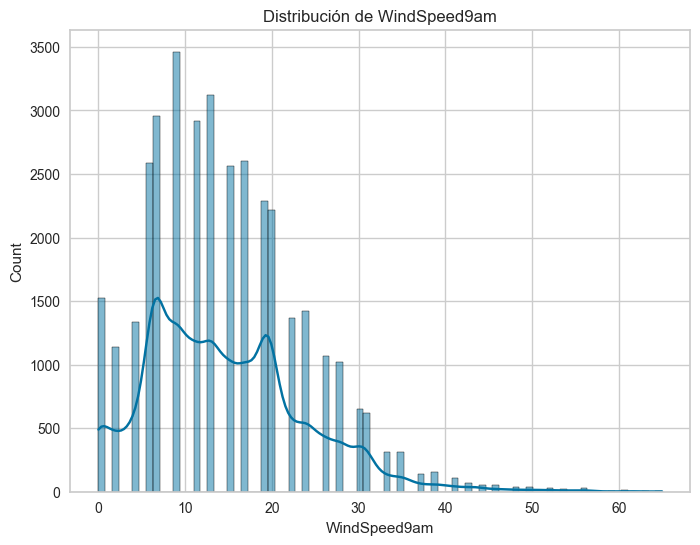

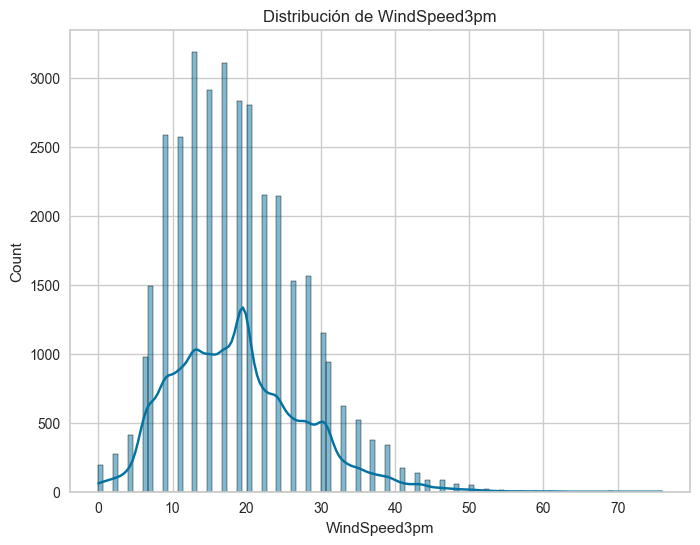

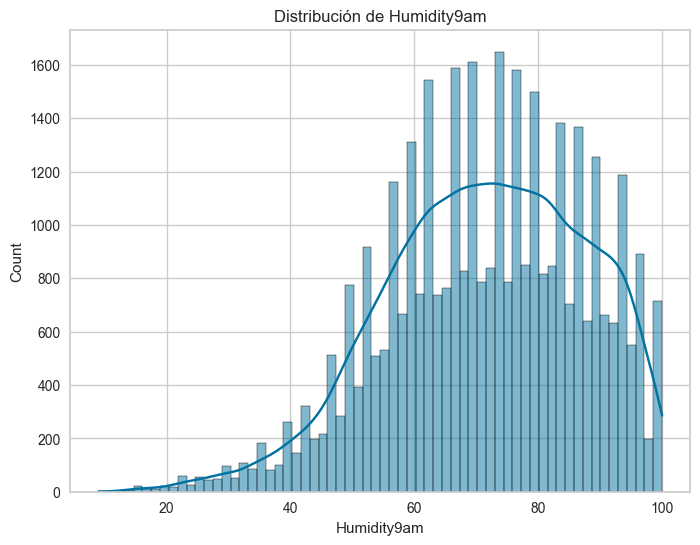

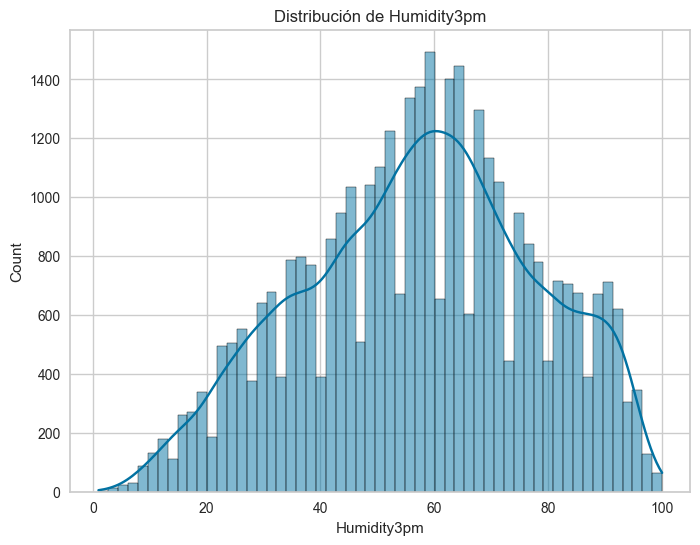

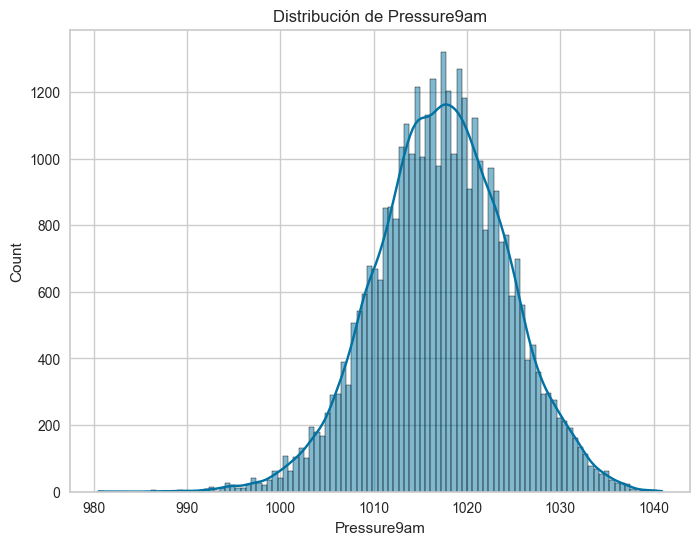

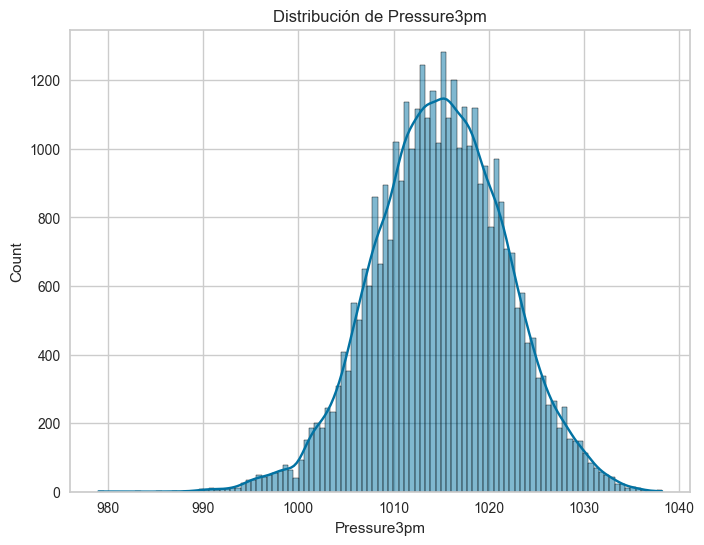

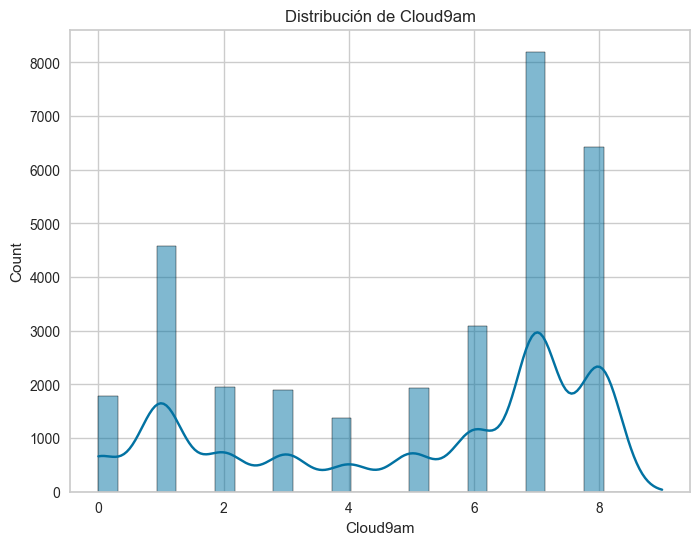

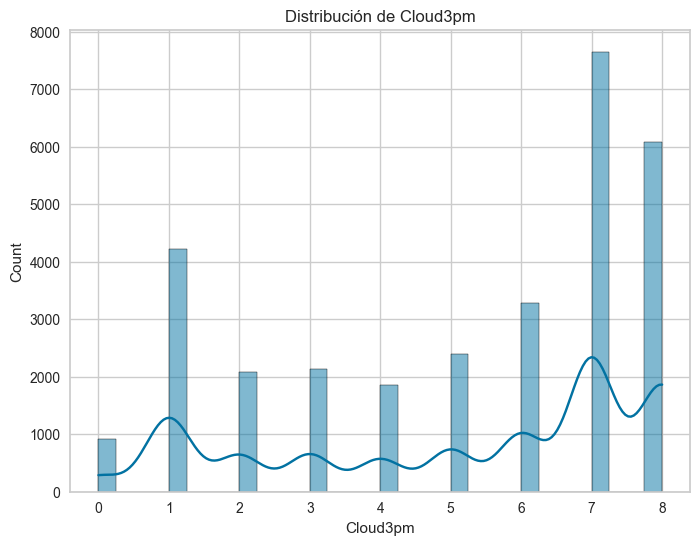

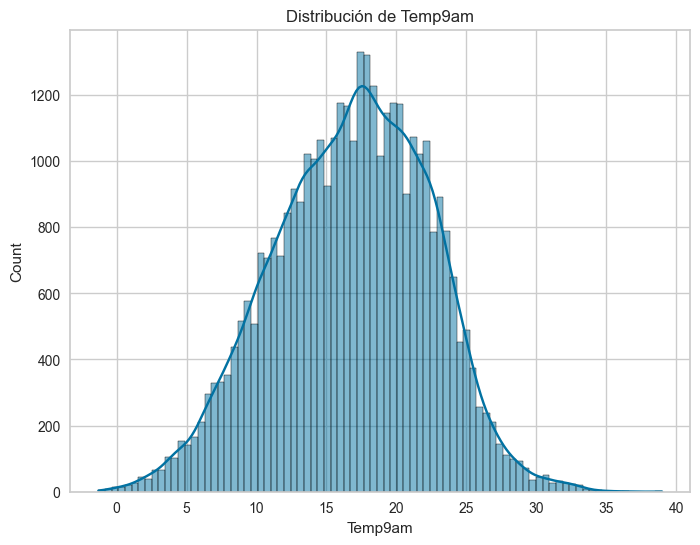

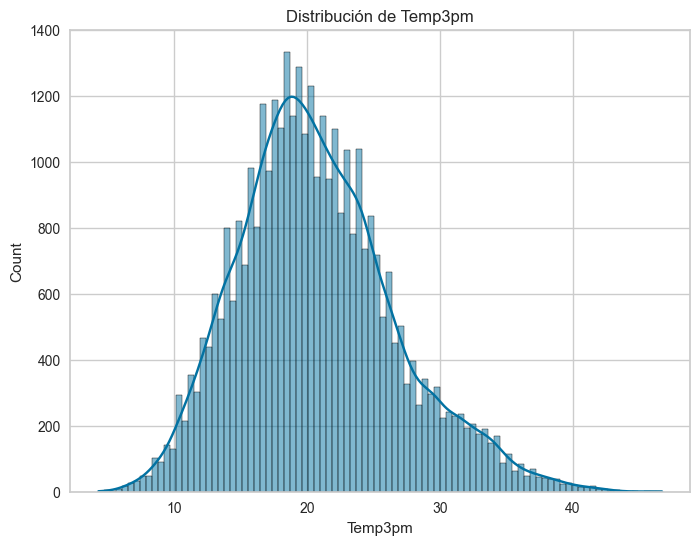

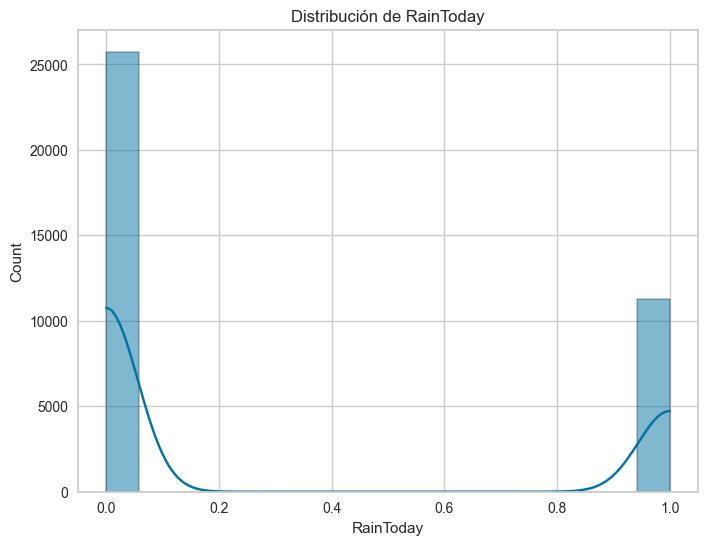

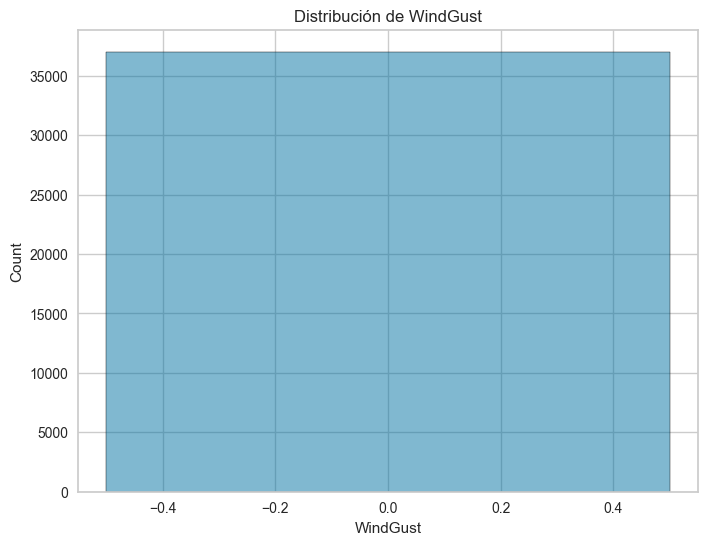

In [90]:
# Visualizamos las distribuciones de estas variables con seaborn
for col in df_train_num.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train_num[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

Parece que 2 variables (rainfall y evaporation) tienen 2 distribuciones muy asimetricas, capaz se podria transformar.

In [91]:
train.groupby('Cloud9am')['RainTomorrow'].mean()

Cloud9am
0.0    0.106061
1.0    0.253223
2.0    0.406330
3.0    0.432632
4.0    0.475983
5.0    0.506186
6.0    0.565330
7.0    0.629589
8.0    0.739835
9.0    0.000000
Name: RainTomorrow, dtype: float64

Se nota que cloud9am y 3pm aunque sean variables categóricas son ordinales, esto quiere decir que 8 signfica que hay mas nubes que en 7, parece haber solo 2 observaciones con nivel 9, por lo que lo trataremos como datos mal imputados (la probabilidad de lluvia aumenta conforme es mas grande)

In [92]:
# Cambiamos las 2 observaciones con cloud9am = 9.0 a  0
X_train.loc[X_train['Cloud9am'] == 9.0, 'Cloud9am'] = 0
X_test.loc[X_test['Cloud9am'] == 9.0, 'Cloud9am'] = 0

In [93]:
# Dropeamos Date y Location
X_train = X_train.drop(['Date', 'Location'], axis=1)
X_test = X_test.drop(['Date', 'Location'], axis=1)

In [94]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

### Estandarización

In [95]:
cols = X_train_num.columns
cols = cols.drop(labels = ['RainToday', 'WindGust', 'Cloud9am', 'Cloud3pm'])
# Cloud9am y 3pm es ordinal y tienen relacion lineal con la variable respuesta
# asi que se quedan asi
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm'],
      dtype='object')

In [96]:
# Normalizamos con PowerScaler las columnas numericas
scaler = PowerTransformer()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

### Análisis y decisión sobre datos faltantes

In [97]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'WindGust'],
      dtype='object')

In [98]:
sqrt(len(X_train))

192.43180610283738

In [99]:
# Imputamos la moda en las varibles categoricas (RainToday, Windgust, 'Cloud9am', 'Cloud3pm')
RainToday_mode = X_train['RainToday'].mode()[0]
X_train['RainToday'].fillna(RainToday_mode, inplace=True)
X_test['RainToday'].fillna(RainToday_mode, inplace=True)

WindGust_mode = X_train['WindGust'].mode()[0]
X_train['WindGust'].fillna(WindGust_mode, inplace=True)
X_test['WindGust'].fillna(WindGust_mode, inplace=True)

Cloud9am_mode = X_train['Cloud9am'].mode()[0]
X_train['Cloud9am'].fillna(Cloud9am_mode, inplace=True)
X_test['Cloud9am'].fillna(Cloud9am_mode, inplace=True)

Cloud3pm_mode = X_train['Cloud3pm'].mode()[0]
X_train['Cloud3pm'].fillna(Cloud3pm_mode, inplace=True)
X_test['Cloud3pm'].fillna(Cloud3pm_mode, inplace=True)

# Completamos datos faltantes por kmeans

imputer = KNNImputer(n_neighbors=155)
X_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)



In [100]:
(abs(X_train) > 3).sum()

MinTemp              3
MaxTemp             45
Rainfall             0
Evaporation         89
WindGustSpeed       77
Humidity9am          0
Humidity3pm          0
Pressure3pm        103
Cloud9am         26810
Cloud3pm         27686
RainToday            0
WindGust             0
dtype: int64

## Consigna 2

### Implementamos el modelo de clasificación con regresión logística

In [101]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

### Cálculo de métricas

In [102]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")        # Promedio ponderado entre presición y recall

Accuracy: 0.7640959170447181
Precision: 0.7689443714410863
Recall: 0.7566810344827586
F1 Score: 0.7627634151640235


### Matriz de confusión

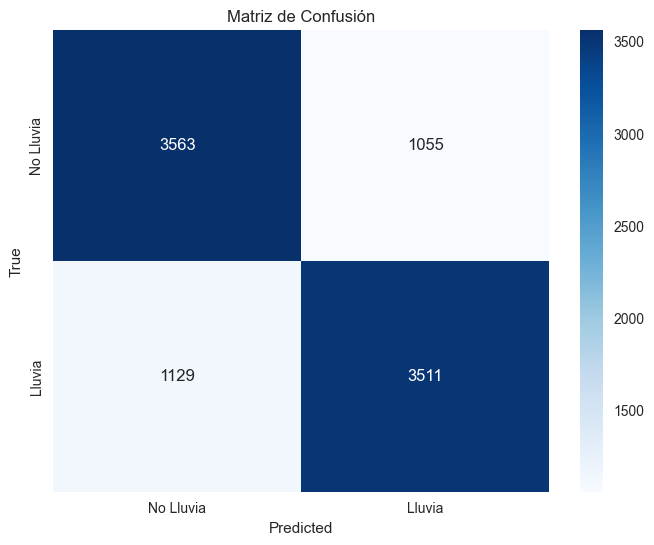

In [103]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Lluvia", "Lluvia"], yticklabels=["No Lluvia", "Lluvia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

Falsos positivos: Casos en que se predice lluvia para el día siguiente, pero que no sucedió.

Falsos negativos: Casos en que se predice que no lloverá al día siguiene y luego llueve.

### Curva ROC y el AUC

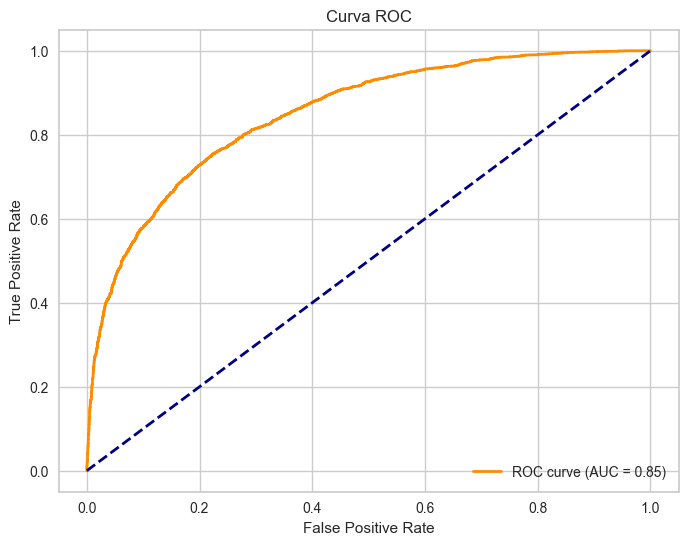

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Analizar el mejor umbral

In [106]:
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    precision_adjusted = precision_score(y_test, y_pred_adjusted, zero_division=1)
    recall_adjusted = recall_score(y_test, y_pred_adjusted)
    f1_adjusted = f1_score(y_test, y_pred_adjusted)
    print(f"Threshold: {threshold:.2f}, Precision: {precision_adjusted:.2f}, Recall: {recall_adjusted:.2f}, F1: {f1_adjusted:.2f}")

Threshold: inf, Precision: 1.00, Recall: 0.00, F1: 0.00
Threshold: 1.00, Precision: 1.00, Recall: 0.00, F1: 0.00
Threshold: 1.00, Precision: 1.00, Recall: 0.00, F1: 0.00
Threshold: 1.00, Precision: 1.00, Recall: 0.00, F1: 0.00
Threshold: 0.99, Precision: 1.00, Recall: 0.00, F1: 0.00
Threshold: 0.99, Precision: 1.00, Recall: 0.00, F1: 0.01
Threshold: 0.99, Precision: 1.00, Recall: 0.00, F1: 0.01
Threshold: 0.99, Precision: 1.00, Recall: 0.00, F1: 0.01
Threshold: 0.99, Precision: 1.00, Recall: 0.00, F1: 0.01
Threshold: 0.99, Precision: 1.00, Recall: 0.01, F1: 0.01
Threshold: 0.99, Precision: 1.00, Recall: 0.01, F1: 0.01
Threshold: 0.99, Precision: 1.00, Recall: 0.01, F1: 0.02
Threshold: 0.99, Precision: 1.00, Recall: 0.01, F1: 0.02
Threshold: 0.99, Precision: 1.00, Recall: 0.01, F1: 0.02
Threshold: 0.99, Precision: 0.98, Recall: 0.01, F1: 0.02
Threshold: 0.99, Precision: 0.98, Recall: 0.01, F1: 0.02
Threshold: 0.99, Precision: 0.98, Recall: 0.01, F1: 0.02
Threshold: 0.98, Precision: 0.98

Threshold: 0.46, Precision: 0.75, Recall: 0.80, F1: 0.77

Threshold: 0.35, Precision: 0.70, Recall: 0.87, F1: 0.77


AUC : (El área bajo la curva es de 0.83, lo cual indica un modelo aceptable, recordando que un modelo aleatorio tendría un área de 0.5)



Dependiendo la métrica que quiera optimizarse, pueden elegirse diferentes umbrales.
Los umbrales que maximizan F1 (buscaría un mejor equilibrio entre presición y recall) se encuentran entre 0.35 y 0.46.

En ese rango de umbral, podríamos optar por maximizar Presición o Recall dependiendo lo que se busque en contexto. Maximizar presición podría predecir lluvia cuando en realidad no suceda, y viceversa con recall, no predecir lluvia cuando en realidad si suceda.

## Consigna 3

In [108]:
X_train['Humidity3pm'].describe()

count    37030.000000
mean         0.010746
std          0.990776
min         -2.650381
25%         -0.705088
50%          0.073925
75%          0.714741
max          2.113365
Name: Humidity3pm, dtype: float64

In [109]:
X_train['Cloud3pm'].describe()

count    37030.000000
mean         5.429544
std          2.476221
min          0.000000
25%          3.000000
50%          7.000000
75%          7.000000
max          8.000000
Name: Cloud3pm, dtype: float64

In [110]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)   # feature_importances_ que mide la importancia de cada característica para el modelo, convertimos a una serie
top_features = feature_importances.nlargest(2).index.tolist()                           # nlargest(2) selecciona las 2 características con los valores más altos de importancia, .tolist() para convertir los índices a lista

print("Las dos características principales son:", top_features)

Las dos características principales son: ['Humidity3pm', 'Pressure3pm']


In [111]:
X_test['Cloud3pm']

29870    5.0
20336    8.0
8140     1.0
45733    2.0
43853    3.0
        ... 
35895    7.0
39703    7.0
28883    0.0
14737    1.0
22550    7.0
Name: Cloud3pm, Length: 9258, dtype: float64

In [43]:
humidity_threshold = 0
cloud_threshold = 5

y_regla_bi_var = []
for i in range(len(X_test)):
    humidity = X_test['Humidity3pm'].iloc[i]
    cloud = X_test['Cloud3pm'].iloc[i]

    if humidity > humidity_threshold and cloud > cloud_threshold:
        y_regla_bi_var.append(1)
    else:
        y_regla_bi_var.append(0)

print(classification_report(y_test, y_regla_bi_var))

mcc = matthews_corrcoef(y_test, y_regla_bi_var)     # correlación entre las predicciones y las etiquetas reales, MCC de +1 indica una predicción perfecta

print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

kappa = cohen_kappa_score(y_test, y_regla_bi_var)   # nivel de acuerdo entre las predicciones del modelo y las etiquetas reales, ajustando por la probabilidad de acuerdo que ocurriría al azar

print(f"Cohen's Kappa: {kappa:.2f}")

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      4618
           1       0.77      0.61      0.68      4640

    accuracy                           0.71      9258
   macro avg       0.72      0.71      0.71      9258
weighted avg       0.72      0.71      0.71      9258

Matthews Correlation Coefficient (MCC): 0.44
Cohen's Kappa: 0.43


In [112]:
conf_matrix = confusion_matrix(y_test, y_regla_bi_var)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[3764  854]
 [1802 2838]]


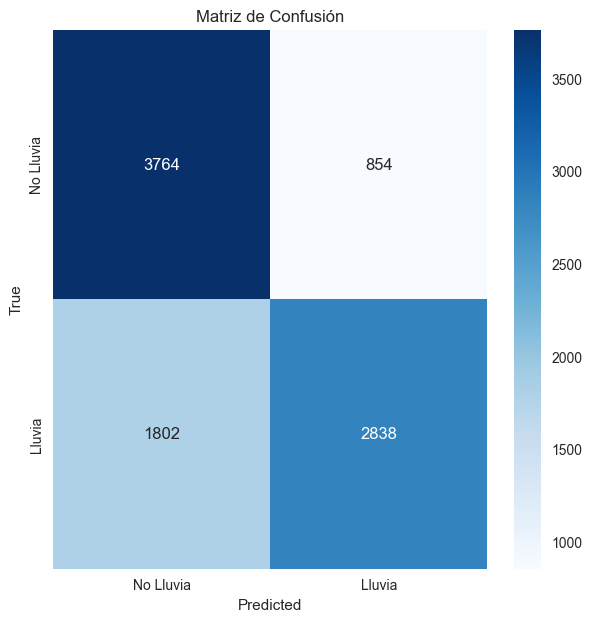

In [113]:
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Lluvia", "Lluvia"], yticklabels=["No Lluvia", "Lluvia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test, y_regla_bi_var).ravel()

print(f"Falsos Positivos : {fp}  ; Falsos Negativos : {fn}")

Falsos Positivos : 854  ; Falsos Negativos : 1802


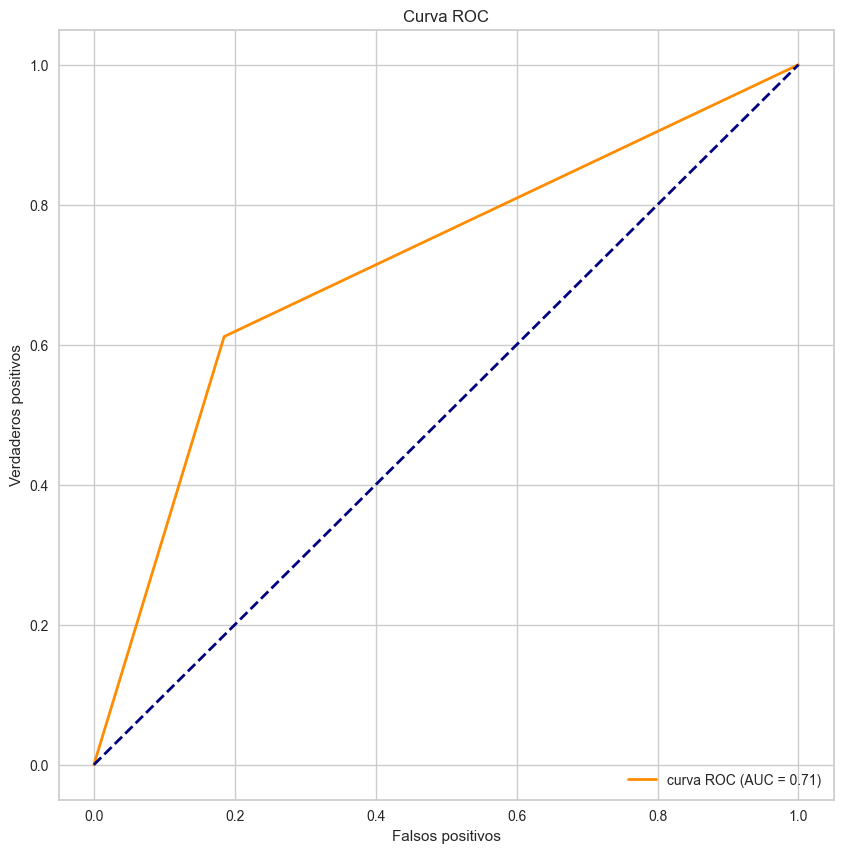

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_regla_bi_var)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [129]:
f1 = f1_score(y_test, y_regla_bi_var)
print(f"F1 Score: {f1}")

F1 Score: 0.6812289966394623


In [131]:
for threshold in thresholds:
    y_pred_adjusted = (y_regla_bi_var >= threshold).astype(int)
    precision_adjusted = precision_score(y_test, y_pred_adjusted, zero_division=1)
    recall_adjusted = recall_score(y_test, y_pred_adjusted)
    f1_adjusted = f1_score(y_test, y_pred_adjusted)
    print(f"Threshold: {threshold:.2f}, Precision: {precision_adjusted:.2f}, Recall: {recall_adjusted:.2f}, F1: {f1_adjusted:.2f}")

Threshold: inf, Precision: 1.00, Recall: 0.00, F1: 0.00
Threshold: 1.00, Precision: 0.77, Recall: 0.61, F1: 0.68
Threshold: 0.00, Precision: 0.50, Recall: 1.00, F1: 0.67


Hemos conseguido fitting aceptable con modelo base, si bien logramos tener una mejor precisión que usando el modelo de regresión logística, en cuanto a Recall y F1 nos devuelven valores inferiores.

El área bajo la curva ha sido inferior en el modelo base implementado (0.71 vs 0.85), y hemos analizado otras métricas como Matthews Correlation Coefficient (MCC) (0.44) y Cohen's Kappa (0.43). 

MCC nos indican la correlación entre las predicciones y las etiquetas reales teniendo en cuenta verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

Cohen's Kappa mide el acuerdo entre las predicciones del modelo y las etiquetas reales, ajustando el valor en función de las predicciones que se podrían haber hecho al azar. Si bien puede ser útil en problemas multiclase, nos pareció una métrica interesante a la hora de analizar si el modelo busca más allá de una predicción aleatoria.

# Consigna 4

In [132]:
logreg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000)
logreg_cv.fit(X_train, y_train)

y_pred_cv = logreg_cv.predict(X_test)
y_pred_proba_cv = logreg_cv.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4618
           1       0.77      0.76      0.76      4640

    accuracy                           0.76      9258
   macro avg       0.76      0.76      0.76      9258
weighted avg       0.76      0.76      0.76      9258



Aun con cv de 5 folds, tenemos unas metricas similares.

Para optimizar hiperparametros vamos a utilizar optuna debido a su eficiencia.

In [133]:
def objective(trial):
    # Definimos los parametros a optimizar

    C = trial.suggest_int('Cs', 1, 50)
    max_iter = trial.suggest_int('max_iter', 100, 2000)

    params = {'Cs': C, 'max_iter': max_iter}

    logreg_optuna = LogisticRegressionCV(cv=5, random_state=0, **params)
    logreg_optuna.fit(X_train, y_train)

    y_pred_optuna = logreg_optuna.predict(X_test)
    f1_optuna = f1_score(y_test, y_pred_optuna)
    return f1_optuna

In [134]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params = study.best_params

[I 2024-11-15 00:05:07,758] A new study created in memory with name: no-name-dd770ca2-c4d0-4da3-8ac3-d16311cddc63
[I 2024-11-15 00:05:11,803] Trial 0 finished with value: 0.7625868055555556 and parameters: {'Cs': 43, 'max_iter': 1933}. Best is trial 0 with value: 0.7625868055555556.
[I 2024-11-15 00:05:15,556] Trial 1 finished with value: 0.7623182114174083 and parameters: {'Cs': 36, 'max_iter': 538}. Best is trial 0 with value: 0.7625868055555556.
[I 2024-11-15 00:05:17,624] Trial 2 finished with value: 0.7628552831416793 and parameters: {'Cs': 16, 'max_iter': 542}. Best is trial 2 with value: 0.7628552831416793.
[I 2024-11-15 00:05:21,986] Trial 3 finished with value: 0.7621733000759137 and parameters: {'Cs': 45, 'max_iter': 1201}. Best is trial 2 with value: 0.7628552831416793.
[I 2024-11-15 00:05:26,162] Trial 4 finished with value: 0.7622559652928417 and parameters: {'Cs': 41, 'max_iter': 1023}. Best is trial 2 with value: 0.7628552831416793.
[I 2024-11-15 00:05:30,915] Trial 5 fi

La mejoria es casi nula debido a la simplicidad de una regresion logistica y sus hiperparametros, capaz en un modelo mas complejo seria notoria.

# Consigna 5

In [135]:
logreg_cv = LogisticRegressionCV(cv=5, random_state=0, **best_params)
logreg_cv.fit(X_train, y_train)

y_pred_cv = logreg_cv.predict(X_test)
explainer = shap.Explainer(logreg_cv, X_train)
shap_values = explainer(X_test)

In [136]:
index=58

In [137]:
feature_names=X_test.columns.values

In [138]:
explanation = shap.Explanation(values=shap_values[index],
                               base_values=explainer.expected_value, # se muestra como un punto de partida específico para la instancia seleccionada
                               feature_names=feature_names)

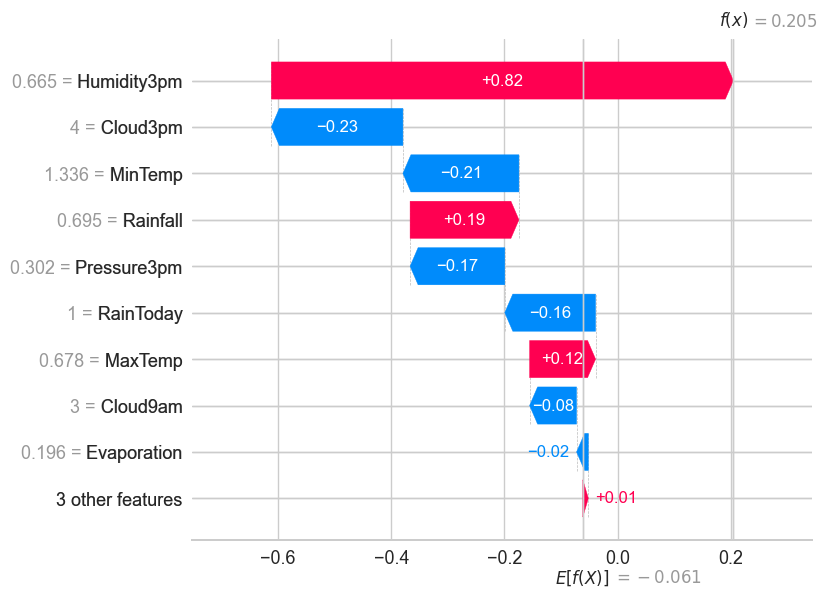

In [139]:
shap.plots.waterfall(explanation)

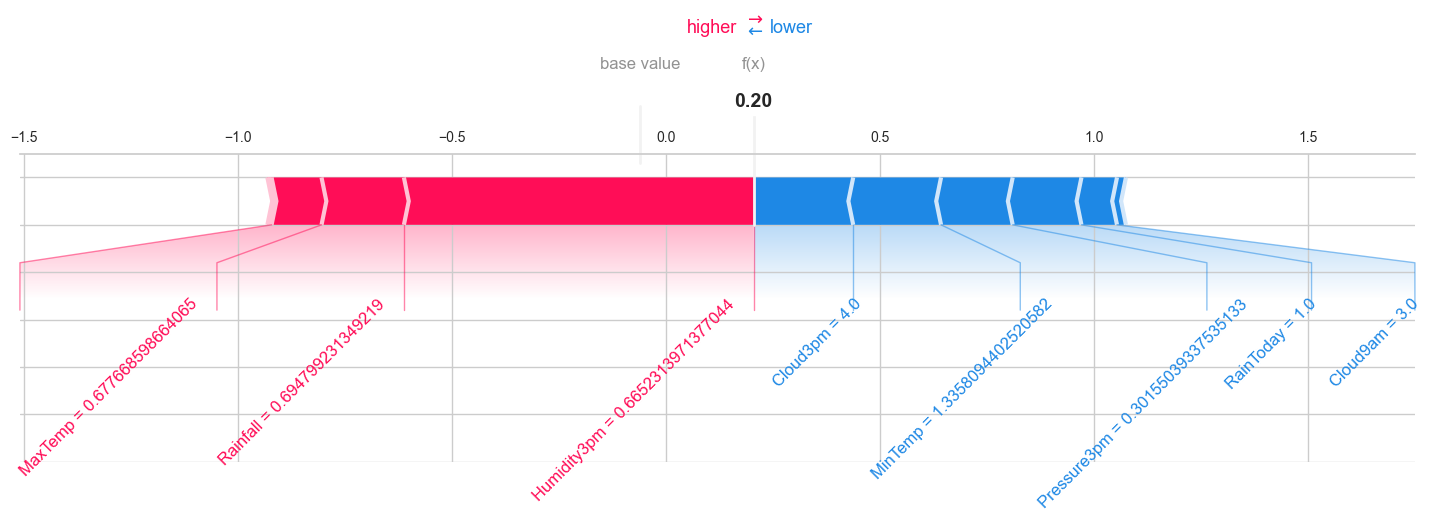

In [140]:
shap.force_plot(
    explainer.expected_value,     # se interpreta como el valor base global, por eso dan distintos números
    shap_values[index].values,    # valores SHAP de la instancia seleccionada
    X_test.iloc[index],           # seleccionamos al fila específica
    feature_names=feature_names,  
    matplotlib=True, 
    figsize=(18, 4),
    text_rotation=45
)

In [141]:
X_test.iloc[index]

MinTemp          1.335809
MaxTemp          0.677669
Rainfall         0.694799
Evaporation      0.195731
WindGustSpeed   -0.012130
Humidity9am      0.036079
Humidity3pm      0.665231
Pressure3pm      0.301550
Cloud9am         3.000000
Cloud3pm         4.000000
RainToday        1.000000
WindGust         0.000000
Name: 9931, dtype: float64

In [142]:
df.iloc[index]

Date             2009-01-29
Location             Albury
MinTemp                21.8
MaxTemp                41.5
Rainfall                0.0
Evaporation             NaN
Sunshine                NaN
WindGustDir              SW
WindGustSpeed          24.0
WindDir9am              ESE
WindDir3pm                S
WindSpeed9am            6.0
WindSpeed3pm           11.0
Humidity9am            38.0
Humidity3pm            13.0
Pressure9am          1015.7
Pressure3pm          1011.8
Cloud9am                NaN
Cloud3pm                NaN
Temp9am                29.0
Temp3pm                40.1
RainToday                 0
RainTomorrow              0
Name: 59, dtype: object

Pudimos ver que en esta observación, si bien la variable con mayor influencia en el modelo ("Humidity3pm") nos podría haber indicado una gran probabilidad de lluvia para el día siguiente, el resto de las variables bajaron significativamente la estimación para concluir de manera acertada en la predicción.

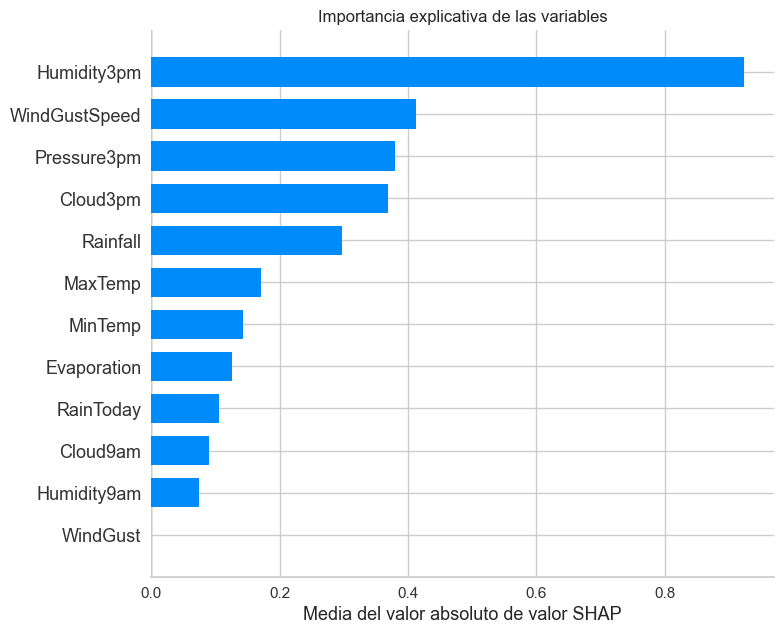

In [143]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show = False)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('Media del valor absoluto de valor SHAP')
ax.set_title('Importancia explicativa de las variables')
plt.show()

En este grafico se nota la importancia del valor absoluto SHAP de cada variable, pero no se logra distinguir si nos da menos o mas chances logaritmicas de la lluvia, ademas de no saber en que valores de cada variable se obtienen estas chances.

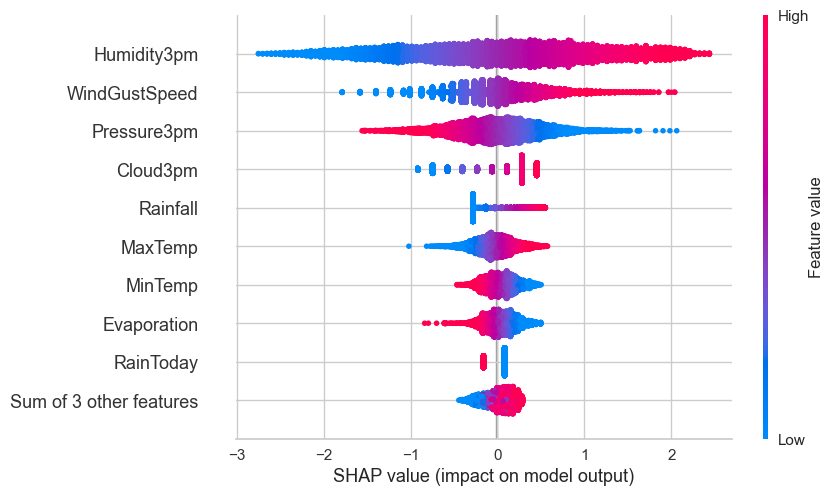

In [144]:
shap.plots.beeswarm(shap_values)

En linea con lo visto anteriormente, humedad 3pm tiene una importancia predictiva alta. Al ser un modelo lineal, se nota el gradiente en todas las variables, ya sea de valores altos a bajos o viceversa.

# Consigna 6

In [145]:
model_setup = setup(data = X_train, target = y_train, session_id = 123)

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Original data shape,"(37030, 13)"
4,Transformed data shape,"(37030, 13)"
5,Transformed train set shape,"(25921, 13)"
6,Transformed test set shape,"(11109, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [146]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9090,0.9698,0.9148,0.9042,0.9095,0.8180,0.8181,0.4400
rf,Random Forest Classifier,0.8989,0.9638,0.9282,0.8768,0.9017,0.7978,0.7992,0.6280
dt,Decision Tree Classifier,0.8503,0.8504,0.9182,0.8084,0.8598,0.7007,0.7073,0.0420
lightgbm,Light Gradient Boosting Machine,0.8007,0.8881,0.8030,0.7993,0.8011,0.6014,0.6015,0.2020
knn,K Neighbors Classifier,0.7782,0.8572,0.8115,0.7609,0.7853,0.5565,0.5578,0.4160
gbc,Gradient Boosting Classifier,0.7755,0.8652,0.7628,0.7828,0.7726,0.5511,0.5514,0.5950
ada,Ada Boost Classifier,0.7643,0.8522,0.7404,0.7774,0.7585,0.5286,0.5293,0.1810
ridge,Ridge Classifier,0.7608,0.8457,0.7489,0.7671,0.7578,0.5215,0.5218,0.0170
lda,Linear Discriminant Analysis,0.7608,0.8457,0.7489,0.7671,0.7578,0.5215,0.5218,0.0200
lr,Logistic Regression,0.7600,0.8458,0.7525,0.7638,0.7581,0.5199,0.5200,0.5840


In [66]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [147]:
predictions= predict_model(best, data = X_test)
print(classification_report(y_test, predictions['prediction_label']))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4618
           1       0.92      0.94      0.93      4640

    accuracy                           0.93      9258
   macro avg       0.93      0.93      0.93      9258
weighted avg       0.93      0.93      0.93      9258



Observamos el modelo ExtraTreesClassifier logra las mejores métricas. Y cuenta con una funcionalidad amplia para el análisis y visualizaión de resultados